<a href="https://colab.research.google.com/github/YoussefElkilaney/Kaggle-Competitions/blob/master/House%20Prices%20Competition/House_Prices_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
# Read the data
X_full = pd.read_csv('train.csv', index_col='Id')
X_test = pd.read_csv('test.csv')
output = pd.DataFrame({'Id': X_test.Id})
y = X_full.SalePrice

X_full.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [53]:
X_test = X_test[high_corr_cols]
X_test = StandardScaler().fit_transform(X_test)


In [28]:
_ = abs(X_full.corr()[-1:])
high_corr_cols = _[_>.1].dropna(axis=1).columns[:-1]
X_full = X_full[high_corr_cols]
X_test = X_test[high_corr_cols]
X_full.shape

(1460, 26)

In [31]:
_ = (X_full.isna().sum())
_ = _[_>0].index
for col in _:
    X_full[col] = X_full[col].fillna(X_full[col].mode()[0])
X_full.isna().sum().sum()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
ScreenPorch,0.036907,0.04316,0.064886,-0.050364,-0.03874,0.062248,0.062021,-0.012579,0.084489,0.088758,0.040606,0.10151,0.023148,-0.008106,0.072426,0.0443,-0.051613,0.059383,0.18453,-0.089013,0.050494,0.051412,-0.074181,0.074304,-0.082864,1.0


In [33]:
X = StandardScaler().fit_transform(X_full)
X_test = StandardScaler().fit_transform(X_test)

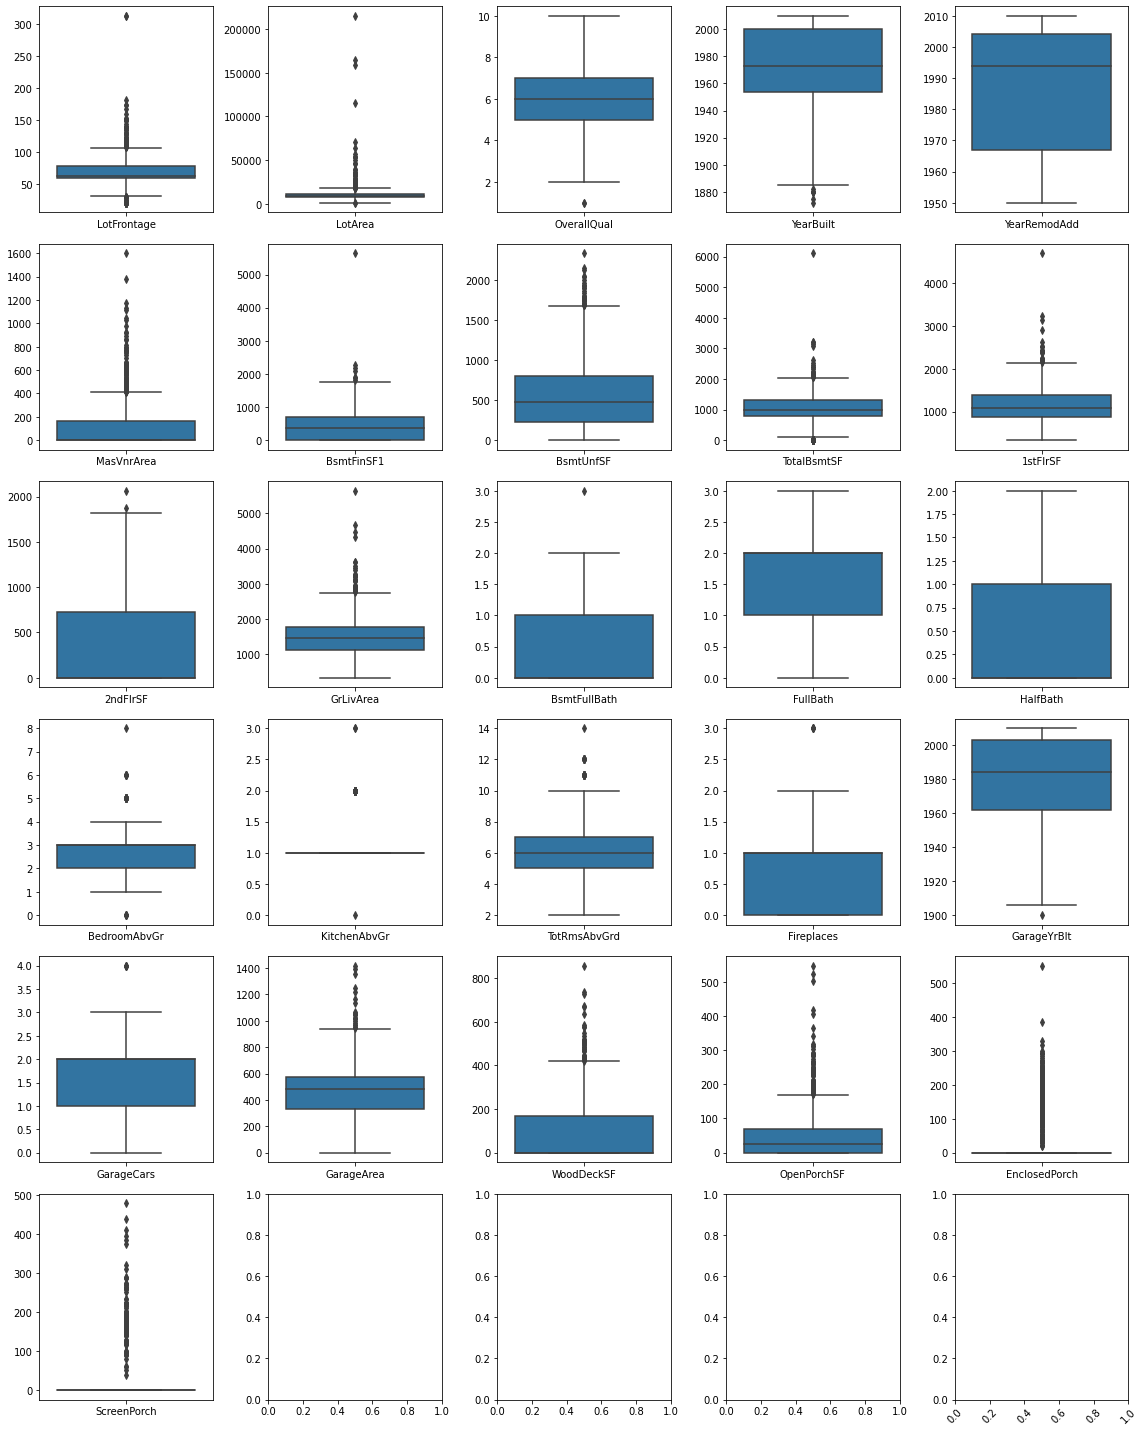

In [34]:
Fig, axs = plt.subplots(ncols = 5, nrows = 6, figsize=(16,20))
axs = axs.ravel()

for i in range(X_full.shape[1]):
    sb.boxplot(data=X_full[X_full.columns[i:i+1]], ax=axs[i])

plt.xticks(rotation=45)
plt.tight_layout()

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2)

#Ridge
params = {
    'alpha': [25, 35],
    'max_iter': [None, 1000, 5000],
    'solver': ['svd', 'lsqr', 'sag', 'saga', 'sparse_cg', 'sparse_cg']
}

M1 = GridSearchCV(
    Ridge(),
    scoring='neg_mean_absolute_error',
    param_grid=params,
    cv=3,
    n_jobs=-1,
    verbose=1
)
M1.fit(X_train, y_train)
print(M1.best_estimator_)

mean_absolute_error(y_val, M1.predict(X_val))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Ridge(alpha=35, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      random_state=None, solver='saga', tol=0.001)


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    1.6s finished


21310.61623014826

In [43]:
# Lasso
params = {
    'alpha': [0.1, 1, 3],
    'max_iter': [40_000],
}

M2 = GridSearchCV(
    Lasso(),
    scoring='neg_mean_absolute_error',
    param_grid=params,
    cv=3,
    n_jobs=-1,
    verbose=1
)

M2.fit(X_train, y_train)
print(M2.best_estimator_)

mean_absolute_error(y_val, M2.predict(X_val))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Lasso(alpha=3, copy_X=True, fit_intercept=True, max_iter=40000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.3s finished


21544.58189282041

In [45]:
# SVC
params = {
    'kernel': ['rbf', 'sigmoid', 'linear'],
    'C'  : [0,0.5,1,4],
    'gamma' : [None, 0.01, 0.1, 1, 3]  
}

M3 = GridSearchCV(
    SVR(),
    scoring='neg_mean_absolute_error',
    param_grid=params,
    cv=3,
    n_jobs=-1,
    verbose=1
)

M3.fit(X_train, y_train)
print(M3.best_estimator_)

mean_absolute_error(y_val, M3.predict(X_val))

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


SVR(C=4, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.7s finished


38809.095492937115

In [46]:
#Gradient Boost
params = {
    'n_estimators': [500],
    'learning_rate': [0.01, 0.03, 0.1, 1],
    'loss': ['ls'],
}

M4 = GridSearchCV(
    GradientBoostingRegressor(),
    scoring='neg_mean_absolute_error',
    param_grid=params,
    cv=3,
    n_jobs=-1,
    verbose=1
).fit(X_train, y_train)

print(M4.best_estimator_)

mean_absolute_error(y_val, M4.predict(X_val))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   13.3s finished


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.03, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


15653.837420313565

In [41]:
# XG boost
params = {
    'learning_rate': [0.003, 0.01],
    'n_estimators': [3000, 4000],
    'max_depth': [2, 3],
    'min_child_weight': [0, 1],
    'gamma': [0],
    'subsample': [0.5, 0.7],
    'colsample_bytree':[0.5, 0.7],
    'objective': ['reg:squarederror'],
    'scale_pos_weight': [1, 2],
    'reg_alpha': [0.00001, 0.001]
}

M5 = GridSearchCV(
    XGBRegressor(),
    scoring='neg_mean_absolute_error',
    param_grid=params,
    cv=3,
    n_jobs=-1,
    verbose=1
).fit(X,y)

print(M5.best_estimator_)

mean_absolute_error(y_val, M5.predict(X_val))

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 27.9min finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.003, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=1)


11830.16743364726

In [63]:
# !pip install kaggle

!mv /root/kaggle.json /root/.kaggle/kaggle.json 


In [64]:
submission_ans = M5.predict(X_test)
output['SalePrice'] = submission_ans
output.to_csv('submission.csv', index=False)
!kaggle competitions submit -c home-data-for-ml-course -f submission.csv -m "Test"

100% 21.1k/21.1k [00:04<00:00, 4.58kB/s]
Successfully submitted to Housing Prices Competition for Kaggle Learn Users

In [ ]:
# Correlation - drop <.1 corr
# NAs - Fill numerical with mean-median-mode # Fill Categorical with most-frequent
# Categoricall - Numerical - Only Numerical
# Duplicates - None
# Outliers
# Covariance , VIF
# GridSearchCV
# XGBoost
# Feature Engineering